# Decision tree
Decision tree is a kind of supervised learning technique using in classification and regression. Boosting and random forest can improve the performance
* **Advantages:**
    - Simple to undestand and visulize the tree
    - No need data preparation such as normalisation
    - Logarithmic O (logN) running time.
* **Disadvantages:**
    - Problem of overfitting
    - Base on heuristic algorithms such as greedy algorithm.
    - Can be unstable due to some small variantion on data.

Good reference for understand more about [**_decision tree_**](http://www.saedsayad.com/decision_tree.htm)

## Example 1
Given 2 dataset with blue class and red class with the number corssponding for blue = 0, red = 1.

The sample data is belong to [1]


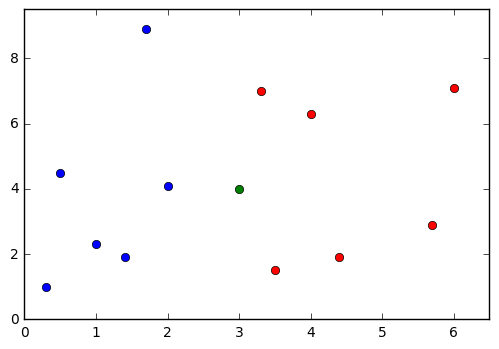

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

# Blue class classify as 0
xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])

# Red class classify as 1
xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

# Consolidate all data
X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) 

# Classification 
classification = tree.DecisionTreeClassifier()
classification.fit(X, y)

# Sample data for predict
xSample = 3
ySample = 4

# Prediction the sample data
print "The sample data is belong to", classification.predict([[xSample, ySample]])

# Ploting the data
plt.plot(xBlue, yBlue, 'ro', color='blue')
plt.plot(xRed, yRed, 'ro', color='red')
plt.plot(xSample, ySample, 'ro', color='green')

plt.axis([0, 6.5, 0, 9.5])
plt.show()


## Example 2
Given the data in csv file about iris dataset. Using 80% of this dataset for training and 20% use for test.
After training, use this model to predict the given dataset which is testing dataset

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

iris_data = pd.read_csv('./iris_data.csv')

print '********************************** HEAD **************************************'
print iris_data.head()
print '********************************* DESCRIBE ***********************************'
print iris_data.describe()
print '*******************************  CORRILATE ***********************************'
print iris_data.corr()
print '******************************************************************************'

# Load the dataset and save to features and targetVariable
features = iris_data[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
targetVariables = iris_data.Class

# Split dataset into 2 sub-dataset, one for training (80%) and the other for testing (20%)
featuresTrain, featureTest, targetTrain, targetTest = train_test_split(features, targetVariables, test_size=0.2)

# Traing the featuresTrain dataset
model = DecisionTreeClassifier()
model.fit(featuresTrain, targetTrain)

# Predict the testing samples
predictions = model.predict(featureTest)
print "Result of feature Test", predictions

# Analysic the result
print '******************************************************************************'
print confusion_matrix(targetTest, predictions)
print "The accuracy score", accuracy_score(targetTest, predictions)


********************************** HEAD **************************************
   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
********************************* DESCRIBE ***********************************
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max 